In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [13]:
all_data_df = pd.read_csv('data/solvents_results_UDM.csv')
all_data_df['conv'].mean()

67.09615384615384

In [6]:
# In the "performance_data.ipynb" file, we created a csv file called "performance.csv" with all the performance data.
# I'm not actually sure where this file is now, probably we could re-generate it from solvents_results.xml
# I'm just going to define a dictionary with the data from the df in that ipynb file

In [7]:
# Your data
real = np.array([93,82,42,44,71,81,92,67,10,60,62,32,61,93,82,42,44,71,81,92,67,10,60,62,32,61,93,82,42,44,71,81,92,67,10,60,62,32,61])
predicted = np.array([91.3,75.99,58.55,63.3,82.01,85.6,79.47,72.89,85.12,66.68,47.13,75.15,49.73,82.796122,96.703325,62.171404,71.096424,101.954039,76.201293,82.941613,90.171106,92.943902,44.905004,37.364323,43.767632,67.961082,50.484355,90.79658,49.648117,66.43363,143.758012,80.953394,76.644353,123.363098,-21.674469,68.702275,53.135668,84.506061,-97.85678])
regressor = ['random_forest']*13 + ['linear_regression']*13 + ['gaussian_process']*13

# Splitting the data by model architecture
real_by_model = {'random_forest': [], 'linear_regression': [], 'gaussian_process': []}
predicted_by_model = {'random_forest': [], 'linear_regression': [], 'gaussian_process': []}

for i, model in enumerate(regressor):
    real_by_model[model].append(real[i])
    predicted_by_model[model].append(predicted[i])

# Calculating RMSE, R^2, and p-value for each model
results = {}
for model in real_by_model.keys():
    real_values = np.array(real_by_model[model])
    predicted_values = np.array(predicted_by_model[model])
    rmse = np.sqrt(mean_squared_error(real_values, predicted_values))
    r_squared = r2_score(real_values, predicted_values)
    
    # Add a constant to use as the intercept for OLS model
    X2 = sm.add_constant(predicted_values)
    est = sm.OLS(real_values, X2)
    est2 = est.fit()
    
    # Storing results, including p-value for the model fit
    results[model] = {
        'RMSE': rmse,
        'R^2': r_squared,
        'p-value': est2.f_pvalue  # p-value for the overall model significance
    }

# Print results
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.3f}, R^2 = {metrics['R^2']:.3f}, p-value = {metrics['p-value']:.3g}")
    
# Print results
for model, metrics in results.items():
    print(f"{model}: R^2 = {metrics['R^2']:.3f}, p-value = {metrics['p-value']:.3g}")


random_forest: RMSE = 26.190, R^2 = -0.264, p-value = 0.447
linear_regression: RMSE = 29.040, R^2 = -0.554, p-value = 0.379
gaussian_process: RMSE = 55.680, R^2 = -4.713, p-value = 0.26
random_forest: R^2 = -0.264, p-value = 0.447
linear_regression: R^2 = -0.554, p-value = 0.379
gaussian_process: R^2 = -4.713, p-value = 0.26


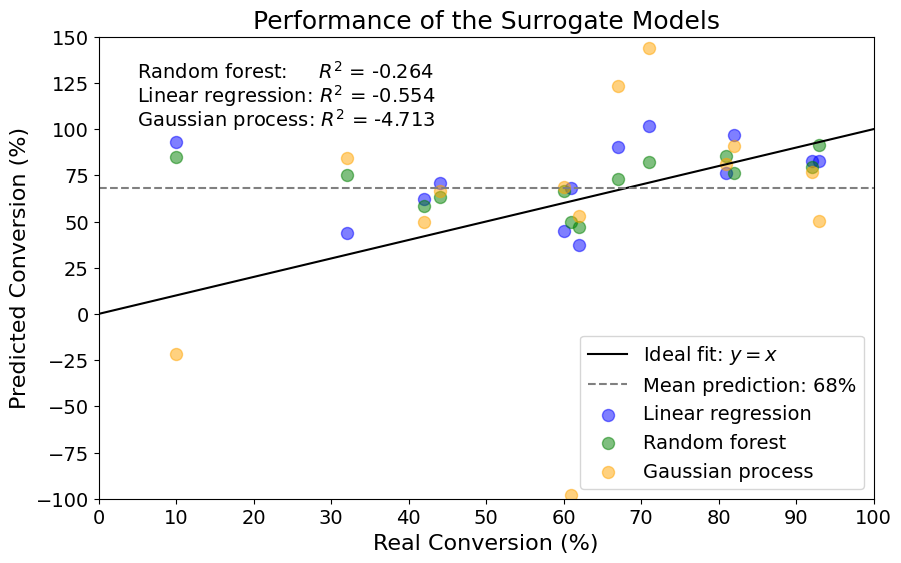

In [16]:
# Your data
real = np.array([93,82,42,44,71,81,92,67,10,60,62,32,61,93,82,42,44,71,81,92,67,10,60,62,32,61,93,82,42,44,71,81,92,67,10,60,62,32,61])
predicted = np.array([91.3,75.99,58.55,63.3,82.01,85.6,79.47,72.89,85.12,66.68,47.13,75.15,49.73,82.796122,96.703325,62.171404,71.096424,101.954039,76.201293,82.941613,90.171106,92.943902,44.905004,37.364323,43.767632,67.961082,50.484355,90.79658,49.648117,66.43363,143.758012,80.953394,76.644353,123.363098,-21.674469,68.702275,53.135668,84.506061,-97.85678])

# Performance metrics
metrics = {
    "Random forest": {"R^2": -0.264, "p-value": 0.447},
    "Linear regression": {"R^2": -0.554, "p-value": 0.379},
    "Gaussian process": {"R^2": -4.713, "p-value": 0.260}
}


# Plotting
plt.figure(figsize=(10, 6))

# y=x line
plt.plot([0, 100], [0, 100], color='black', linestyle='-', label='Ideal fit: $y=x$')

# y=mean(predicted) line
mean_predicted = np.mean(predicted)
plt.axhline(mean_predicted, color='grey', linestyle='--', label=f'Mean prediction: 68%')
# The mean of the train and test sets is 67% and 68% respectively, so barely makes a difference

# Scatter plot of predicted vs real
plt.scatter(real_by_model['linear_regression'], predicted_by_model['linear_regression'], color='blue', alpha=0.5, label='Linear regression', s=75)
plt.scatter(real_by_model['random_forest'], predicted_by_model['random_forest'], color='green', alpha=0.5, label='Random forest', s=75)
plt.scatter(real_by_model['gaussian_process'], predicted_by_model['gaussian_process'], color='orange', alpha=0.5, label='Gaussian process', s=75)



# Annotating with performance metrics
for model, values in metrics.items():
    spaces = ""
    if model == "Random forest":
        spaces = " " * 4
    plt.text(0.05, 0.95 - (list(metrics.keys()).index(model) * 0.05), 
            #  f'{model}:{spaces} $R^2$ = {values["R^2"]}, p-value = {values["p-value"]}', 
             f'{model}:{spaces} $R^2$ = {values["R^2"]}', 
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.title('Performance of the Surrogate Models', fontsize=18)
plt.xlabel('Real Conversion (%)', fontsize=16)
plt.ylabel('Predicted Conversion (%)', fontsize=16)
plt.xticks(np.arange(0, 101, step=10), fontsize=14)
plt.yticks(np.arange(-100, 151, step=25), fontsize=14)
plt.xlim(0, 100)
plt.ylim(-100, 150)
plt.legend(loc='lower right', fontsize=14)
plt.savefig('results.png', dpi=600, bbox_inches='tight')
plt.show()